## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


'\nYour code here (optional)\n確認硬體資源\n'

In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
x_train, y_train = train

In [5]:
x_train.max()

255

In [6]:
type(x_train)

numpy.ndarray

In [7]:
x_train.min()

0

In [8]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = ((x - x.min()) / (x.max() - x.min()) - 0.5)*2
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [9]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [10]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256, 256, 128, 128, 64]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               16512     
__________

In [11]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [12]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [13]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 5s 105us/step - loss: 1.7114 - acc: 0.3875 - val_loss: 1.5354 - val_acc: 0.4563
Epoch 2/100
50000/50000 [==============================] - 3s 50us/step - loss: 1.4722 - acc: 0.4794 - val_loss: 1.4488 - val_acc: 0.4928
Epoch 3/100
50000/50000 [==============================] - 2s 50us/step - loss: 1.3542 - acc: 0.5216 - val_loss: 1.3869 - val_acc: 0.5123
Epoch 4/100
50000/50000 [==============================] - 3s 52us/step - loss: 1.2487 - acc: 0.5576 - val_loss: 1.3615 - val_acc: 0.5255
Epoch 5/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.1620 - acc: 0.5894 - val_loss: 1.3213 - val_acc: 0.5396
Epoch 6/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.0747 - acc: 0.6184 - val_loss: 1.3685 - val_acc: 0.5242
Epoch 7/100
50000/50000 [==============================] - 3s 51us/step - loss: 1.0009 - acc: 0.6450 - val_loss: 1.3800 -

50000/50000 [==============================] - 2s 50us/step - loss: 0.0728 - acc: 0.9765 - val_loss: 3.3133 - val_acc: 0.5341
Epoch 60/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.0714 - acc: 0.9771 - val_loss: 3.2913 - val_acc: 0.5369
Epoch 61/100
50000/50000 [==============================] - 3s 51us/step - loss: 0.0729 - acc: 0.9765 - val_loss: 3.2233 - val_acc: 0.5347
Epoch 62/100
50000/50000 [==============================] - 2s 50us/step - loss: 0.0779 - acc: 0.9757 - val_loss: 3.2258 - val_acc: 0.5317
Epoch 63/100
50000/50000 [==============================] - 2s 50us/step - loss: 0.0783 - acc: 0.9738 - val_loss: 3.1781 - val_acc: 0.5353
Epoch 64/100
50000/50000 [==============================] - 2s 50us/step - loss: 0.0723 - acc: 0.9767 - val_loss: 3.1290 - val_acc: 0.5388
Epoch 65/100
50000/50000 [==============================] - 2s 50us/step - loss: 0.0753 - acc: 0.9765 - val_loss: 3.1611 - val_acc: 0.5273
Epoch 66/100
50000/50000 [==============

Populating the interactive namespace from numpy and matplotlib


C:\Users\William\Anaconda3\envs\cd1\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['test']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


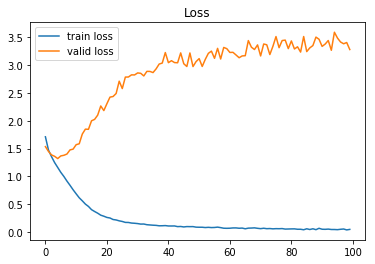

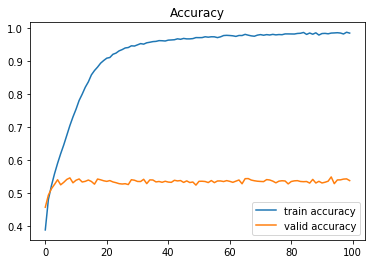

In [15]:
%pylab inline
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()